# Installations

In [95]:
%pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


# Import libraries

In [96]:
# Data Handling
import pyodbc
#from dotenv import dotenv_values
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

# Statistical Analysis
from statsmodels.tsa.stattools import kpss
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import RandomizedSearchCV
import pickle


# Other Packages
import warnings

warnings.filterwarnings("ignore")

# Load the data set 


In [97]:
#training dataset

df=pd.read_csv("C:/Users/OkadaLabStudent/Downloads/train/train.csv")
train_df = pd.read_csv("C:/Users/OkadaLabStudent/Downloads/train/train.csv")
train_df.head()
train_df

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
1111435,2017-08-15,9,POULTRY,438.133,0
1111436,2017-08-15,9,PREPARED FOODS,154.553,1
1111437,2017-08-15,9,PRODUCE,2419.729,148
1111438,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


# Hypothesis

The promotional activities have a significant impact on store sales.

Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.

Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.

# Questions

1. Fidnout if the training data has all the dates between 2013 to 2017. 
2. Which dates have the lowest and highest sales for each year?
3. Determine if certain groups of stores sell more products
4. Are sales affected by promotions?
5. What analysis can we get from the date and its extractable features?
6. Are there certain product families types that exhibit higher sales performance?
7. How does the sales trend vary across different store numbers?

# Exploratory Data Analysis

In [98]:
# Print the shape and column information of the train dataset

print(f"Train Dataset: {train_df.shape}")
print(train_df.info())

Train Dataset: (1111440, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111440 entries, 0 to 1111439
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   date         1111440 non-null  object 
 1   store_nbr    1111440 non-null  int64  
 2   family       1111440 non-null  object 
 3   sales        1111440 non-null  float64
 4   onpromotion  1111440 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 42.4+ MB
None


In [99]:
#changing the data type of date column from 'object' to 'datetime' format

train_df['date'] = pd.to_datetime(train_df['date'])
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111440 entries, 0 to 1111439
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   date         1111440 non-null  datetime64[ns]
 1   store_nbr    1111440 non-null  int64         
 2   family       1111440 non-null  object        
 3   sales        1111440 non-null  float64       
 4   onpromotion  1111440 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 42.4+ MB
None


In [100]:
# Statistical Summary 
train_df.describe()

,store_nbr,sales,onpromotion
count,1.111440e+06,1.111440e+06,1.111440e+06
mean,1.050000e+01,3.418394e+02,2.547265e+00
std,5.766284e+00,9.876164e+02,1.162234e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.750000e+00,0.000000e+00,0.000000e+00
50%,1.050000e+01,1.300000e+01,0.000000e+00
75%,1.525000e+01,2.116000e+02,0.000000e+00
max,2.000000e+01,1.247170e+05,5.190000e+02


In [101]:
#check for missing values
train_df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [102]:
#check for misisng dates
start_date = train_df['date'].min()
end_date = train_df['date'].max()
date_range = pd.date_range(start=start_date, end=end_date)

missing_dates = date_range[~date_range.isin(train_df['date'])]

if len(missing_dates) == 0:
    print("No missing dates")
else:
    print("The following dates are missing:")
    print(missing_dates)

train_df

The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
1111435,2017-08-15,9,POULTRY,438.133,0
1111436,2017-08-15,9,PREPARED FOODS,154.553,1
1111437,2017-08-15,9,PRODUCE,2419.729,148
1111438,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


### Question -1 : Does the training set have all dates?

No, there are some missing dates. Let's ignore it for now and proceed. 

In [103]:
#For now let's ignore these dates and proceed

# Univariate, bivariate and multivariate analysis

In [104]:
#bivariate analysis
#sales trend over time
# Group the data by date and calculate the total sales

daily_sales = train_df.groupby('date')['sales'].sum().reset_index()

# Create a time series plot with slider
fig = px.line(daily_sales, x='date', y='sales')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title='Sales Trend Over Time', title_x=0.5)
fig.show()

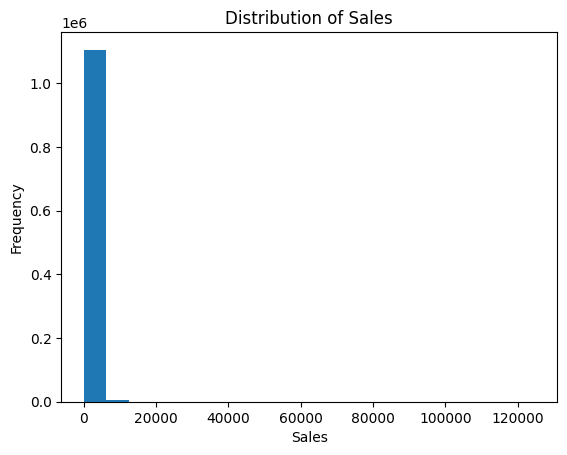

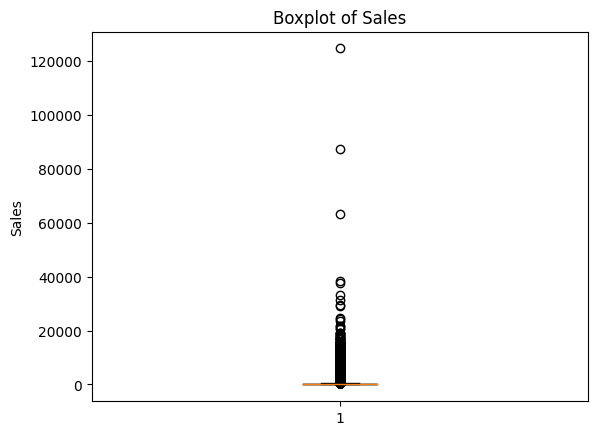

In [105]:
#univariate analysis
#visualising the distribution of sales column through histogram and box plot
# Histogram
plt.hist(train_df['sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

# Boxplot
plt.boxplot(train_df['sales'])
plt.ylabel('Sales')
plt.title('Boxplot of Sales')
plt.show()

The histogram gives the relation between the frequency distribution of sales. The peak shows that majority of the sales lie in the lower sales values. But we can also see a distribution in the higher sale values. This is further confirmed by the box plot where we can see a few points beyond the whiskers.

We can observe that the sales are zero on January first of every year and there also some fluctuations over time showing both high and low sales. This indicates that there are other factors and a potential seasonality affecting sales.

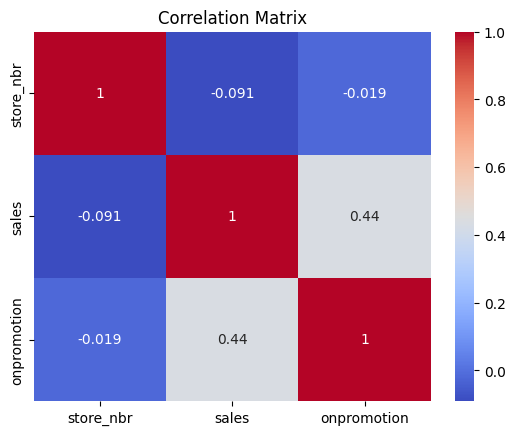

In [106]:
#multivariate analysis
# Compute correlation matrix
corr_matrix = train_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Question - 2 Correlation between sales and promotion

A posotive correlation of 0.44 shows a dependence of sales on the 'onpromotion' variable. When the products are on promotions, their sales also increase. 

# Hypothesis testing

Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.

Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.

In [136]:
from scipy.stats import ttest_ind

# Extract the relevant variables for the hypothesis test
sales_on_promotion = train_df[train_df['onpromotion'] == 1]['sales']
sales_not_on_promotion = train_df[train_df['onpromotion'] == 0]['sales']

# Perform a two-sample t-test to compare sales between promotional and non-promotional periods
t_statistic, p_value = ttest_ind(sales_on_promotion, sales_not_on_promotion)

# Print the test result
print("Hypothesis Testing - Promotions:")

print("Test Statistic:", t_statistic)
print("P-value:", p_value)

Hypothesis Testing - Promotions:
Test Statistic: 126.0293424045203
P-value: 0.0


Since P-value is less than 0.05, reject the null hypothesis. Promotional activities have a significant impact on store sales.

### Question 3 - Visualising sales w.r.t time

In [137]:
#daily sales - highest and lowest
train_df_copy=train_df
train_df_copy['date'] = pd.to_datetime(train_df_copy['date'])
train_df_copy['year'] = train_df_copy['date'].dt.year
train_df_copy['month'] = train_df_copy['date'].dt.month
train_df_copy['day'] = train_df_copy['date'].dt.day
lowest_sales_dates = train_df_copy.groupby('year')['date'].min()
highest_sales_dates = train_df_copy.groupby('year')['date'].max()

print("Lowest sales for each year:\n", lowest_sales_dates)
print("-"*50)
print("Highest sales for each year:\n", highest_sales_dates)

train_df_copy

Lowest sales for each year:
 year
2013   2013-01-01
2014   2014-01-01
2015   2015-01-01
2016   2016-01-01
2017   2017-01-01
Name: date, dtype: datetime64[ns]
--------------------------------------------------
Highest sales for each year:
 year
2013   2013-12-31
2014   2014-12-31
2015   2015-12-31
2016   2016-12-31
2017   2017-08-15
Name: date, dtype: datetime64[ns]


,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week
0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1
1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1
2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1
3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1
4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1
...,...,...,...,...,...,...,...,...,...
1111435,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1
1111436,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1
1111437,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1
1111438,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1


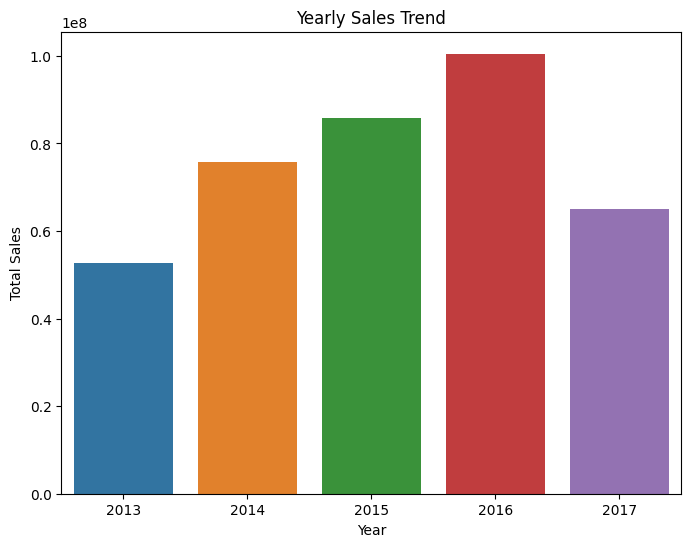

In [109]:
# Yearly Sales Trend
yearly_sales = train_df_copy.groupby('year')['sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_sales, x='year', y='sales')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

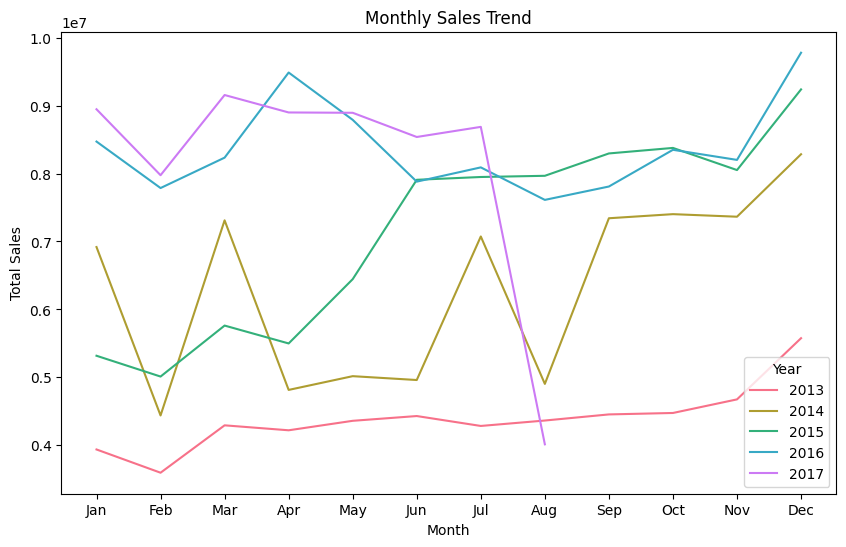

In [110]:
#monthly sales

# Set distinct colors for each year
colors = sns.color_palette("husl", n_colors=len(train_df_copy['year'].unique()))

# Visualize the Monthly Sales Trend
monthly_sales = train_df_copy.groupby(['year', 'month'])['sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', palette=colors)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

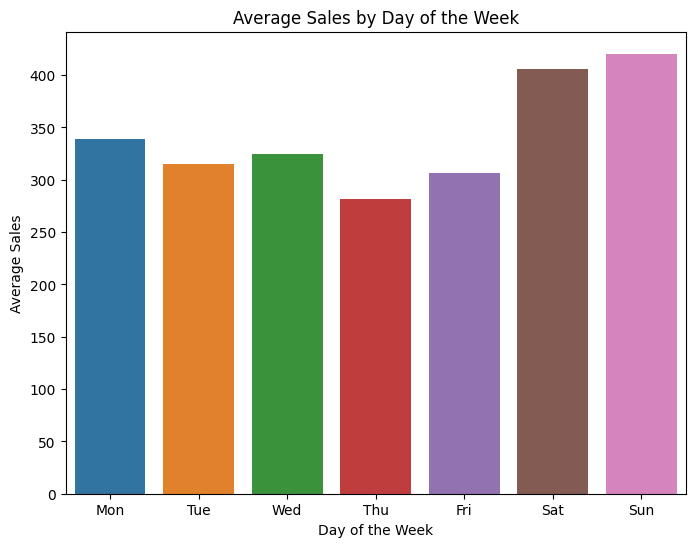

In [111]:
# Visualize the Day of the Week Sales Pattern
train_df_copy['day_of_week'] = train_df_copy['date'].dt.dayofweek
day_of_week_sales = train_df_copy.groupby('day_of_week')['sales'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=day_of_week_sales, x='day_of_week', y='sales')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

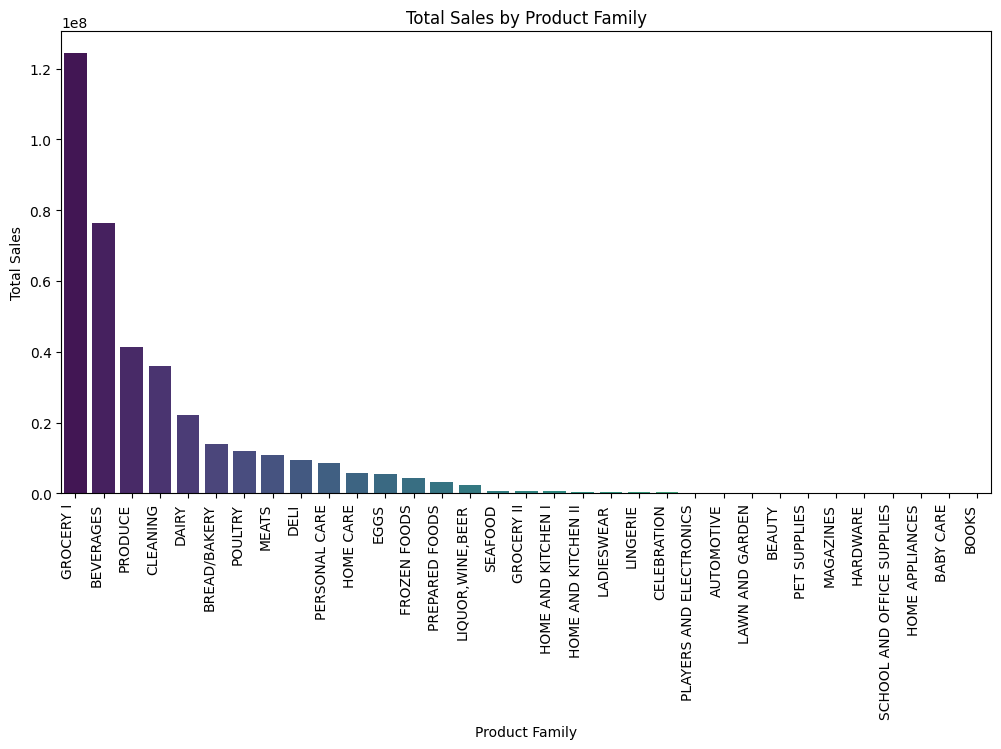

In [112]:
#sales across different family of products
# Group the data by product family and calculate the total sales
family_sales = train_df_copy.groupby('family')['sales'].sum().sort_values(ascending=False)

# Plot the relationship between product family and sales for the top 10 families
plt.figure(figsize=(12, 6))
sns.barplot(x=family_sales.index, y=family_sales.values, palette='viridis')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Family')
plt.xticks(rotation=90, ha='right')
plt.show()

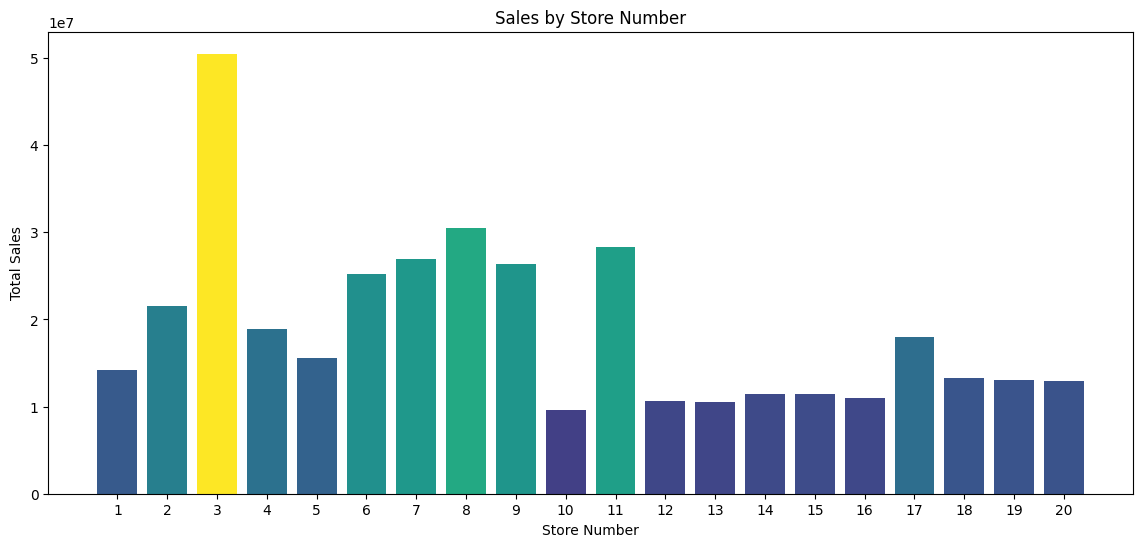

In [113]:
#sales across different stores

store_sales = train_df_copy.groupby('store_nbr')['sales'].sum()

plt.figure(figsize=(14, 6))
plt.bar(store_sales.index, store_sales.values, color=cm.viridis(store_sales.values/max(store_sales.values)))
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Sales by Store Number')

# Set the X-axis limits and ticks

plt.xticks(range(1,train_df_copy['store_nbr'].max()+1))

plt.show()

# Feature Engineering

## Train dataset

In [114]:
train_df_copy

,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week
0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1
1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1
2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1
3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1
4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1
...,...,...,...,...,...,...,...,...,...
1111435,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1
1111436,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1
1111437,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1
1111438,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1


In [115]:
#dropping unnecessary columns

columns_to_drop = ['date']
train_df_copy = train_df_copy.drop(columns=columns_to_drop)

train_df_copy.head()

,store_nbr,family,sales,onpromotion,year,month,day,day_of_week
0,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,1,BABY CARE,0.0,0,2013,1,1,1
2,1,BEAUTY,0.0,0,2013,1,1,1
3,1,BEVERAGES,0.0,0,2013,1,1,1
4,1,BOOKS,0.0,0,2013,1,1,1


In [116]:
#finding out the family of products
unique_families = train_df_copy['family'].unique()
print(unique_families)

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


In [117]:
#grouping up the families

# Define the category lists for each product category
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
clothing_families = ['LINGERIE', 'LADYSWARE']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE']
hardware_families = ['PLAYERS AND ELECTRONICS','HARDWARE']

# Categorize the 'family' column based on the product categories
train_df_copy['family'] = np.where(train_df_copy['family'].isin(food_families), 'FOODS', train_df_copy['family'])
train_df_copy['family'] = np.where(train_df_copy['family'].isin(home_families), 'HOME', train_df_copy['family'])
train_df_copy['family'] = np.where(train_df_copy['family'].isin(clothing_families), 'CLOTHING', train_df_copy['family'])
train_df_copy['family'] = np.where(train_df_copy['family'].isin(grocery_families), 'GROCERY', train_df_copy['family'])
train_df_copy['family'] = np.where(train_df_copy['family'].isin(stationery_families), 'STATIONERY', train_df_copy['family'])
train_df_copy['family'] = np.where(train_df_copy['family'].isin(cleaning_families), 'CLEANING', train_df_copy['family'])
train_df_copy['family'] = np.where(train_df_copy['family'].isin(hardware_families), 'HARDWARE', train_df_copy['family'])

# Print the updated DataFrame
train_df_copy.head()

,store_nbr,family,sales,onpromotion,year,month,day,day_of_week
0,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,1,CLEANING,0.0,0,2013,1,1,1
2,1,BEAUTY,0.0,0,2013,1,1,1
3,1,FOODS,0.0,0,2013,1,1,1
4,1,STATIONERY,0.0,0,2013,1,1,1


### Feature Scaling 

In [118]:
# Scaling Numeric Variables (Min-Max Scaling)
# create an instance of StandardScaler
scaler = StandardScaler()

# reshape the 'sales' column to a 2D array
sales_data = train_df_copy['sales'].values.reshape(-1, 1)

# fit and transform the numerical column
train_df_copy['sales'] = scaler.fit_transform(sales_data)

# Display the updated dataframe
train_df_copy.head()

# Suppose 'predicted_scaled_sales' contains your predicted scaled sales values
predicted_scaled_sales = train_df_copy['sales']  # Replace with your actual predicted values

predicted_scaled_sales

0         -0.346126
1         -0.346126
2         -0.346126
3         -0.346126
4         -0.346126
             ...   
1111435    0.097501
1111436   -0.189635
1111437    2.103945
1111438   -0.223609
1111439   -0.329925
Name: sales, Length: 1111440, dtype: float64

In [119]:
# # Inverse scale the predictions
# original_predicted_sales = scaler.inverse_transform([[value] for value in predicted_scaled_sales])

# # 'original_predicted_sales' should now contain the original scale predicted sales values
# original_predicted_sales

### One hot encoding 

In [120]:
# Define the categorical columns to encode
categorical_columns = ["family"]

# Perform one-hot encoding
encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(train_df_copy[categorical_columns])

# Create column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Convert the one-hot encoded data to a DataFrame
train_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original dataframe with the one-hot encoded data
train_df_encoded = pd.concat([train_df_copy, train_df_encoded], axis=1)

# Drop the original categorical columns
train_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Print the head of the encoded DataFrame
train_df_encoded.head()

,store_nbr,sales,onpromotion,year,month,day,day_of_week,family_AUTOMOTIVE,family_BEAUTY,family_CELEBRATION,...,family_CLOTHING,family_FOODS,family_GROCERY,family_HARDWARE,family_HOME,family_LADIESWEAR,family_LAWN AND GARDEN,"family_LIQUOR,WINE,BEER",family_PET SUPPLIES,family_STATIONERY
0,1,-0.346126,0,2013,1,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,-0.346126,0,2013,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,-0.346126,0,2013,1,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-0.346126,0,2013,1,1,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,-0.346126,0,2013,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Modeling 

In [121]:
train_set.head()

,store_nbr,sales,onpromotion,year,month,day,day_of_week,family_AUTOMOTIVE,family_BEAUTY,family_CELEBRATION,...,family_CLOTHING,family_FOODS,family_GROCERY,family_HARDWARE,family_HOME,family_LADIESWEAR,family_LAWN AND GARDEN,"family_LIQUOR,WINE,BEER",family_PET SUPPLIES,family_STATIONERY
0,1,-0.346126,0,2013,1,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,-0.346126,0,2013,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,-0.346126,0,2013,1,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-0.346126,0,2013,1,1,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,-0.346126,0,2013,1,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [122]:
#data splitting

train_set = train_df_encoded.loc[train_df_encoded['year'].isin([2013, 2014, 2015])]
eval_set = train_df_encoded.loc[train_df_encoded['year'].isin([2016, 2017])]

print(train_set.shape)

print(eval_set.shape)


(720720, 21)
(390720, 21)


In [123]:
eval_set.head()

,store_nbr,sales,onpromotion,year,month,day,day_of_week,family_AUTOMOTIVE,family_BEAUTY,family_CELEBRATION,...,family_CLOTHING,family_FOODS,family_GROCERY,family_HARDWARE,family_HOME,family_LADIESWEAR,family_LAWN AND GARDEN,"family_LIQUOR,WINE,BEER",family_PET SUPPLIES,family_STATIONERY
720720,1,-0.346126,0,2016,1,1,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720721,1,-0.346126,0,2016,1,1,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720722,1,-0.346126,0,2016,1,1,4,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720723,1,-0.346126,0,2016,1,1,4,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720724,1,-0.346126,0,2016,1,1,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [124]:
# Separate the target variable and features for training and testing
X_train = train_set.drop('sales', axis=1)
y_train = train_set['sales'] 


X_eval = eval_set.drop('sales', axis=1)  
y_eval = eval_set['sales']

In [125]:
# Initialize the results dataframe
results_df = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])

# Model - 1 Linear Regression

In [126]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_eval)

# Calculate metrics
lr_mse = mean_squared_error(y_eval, lr_predictions)
lr_mae = mean_absolute_error(y_eval, lr_predictions)

# Apply the absolute value function to both y_eval and lr_predictions
y_eval_abs = abs(y_eval)
lr_predictions_abs = abs(lr_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
lr_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, lr_predictions_abs))

# Create a DataFrame to store results for Linear Regression
results_lr = pd.DataFrame({'Model': ['Linear Regression'],
                            'RMSLE': [lr_rmsle],
                            'RMSE': [np.sqrt(lr_mse)],
                            'MSE': [lr_mse],
                            'MAE': [lr_mae]}).round(2)

# Print the results_lr dataframe
results_lr

,Model,RMSLE,RMSE,MSE,MAE
0,Linear Regression,0.29,0.95,0.91,0.44


# Model - 2 Random Forest Regression

In [127]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_eval)

# Calculate metrics
rf_mse = mean_squared_error(y_eval, rf_predictions)
rf_mae = mean_absolute_error(y_eval, rf_predictions)

# Apply the absolute value function to both y_eval and rf_predictions
y_eval_abs = abs(y_eval)
rf_predictions_abs = abs(rf_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
rf_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, rf_predictions_abs))

# Create a DataFrame to store results for Random Forest
results_rf = pd.DataFrame({'Model': ['Random Forest'],
                            'RMSLE': [rf_rmsle],
                            'RMSE': [np.sqrt(rf_mse)],
                            'MSE': [rf_mse],
                            'MAE': [rf_mae]}).round(2)

# Print the results_rf dataframe
results_rf

,Model,RMSLE,RMSE,MSE,MAE
0,Random Forest,0.31,0.94,0.88,0.37


# Model - 3 Gradient Boosting Regression

In [128]:
# Gradient Boosting Regression Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_eval)

# Calculate metrics
gb_mse = mean_squared_error(y_eval, gb_predictions)
gb_mae = mean_absolute_error(y_eval, gb_predictions)

# Apply the absolute value function to both y_eval and gb_predictions
y_eval_abs = abs(y_eval)
gb_predictions_abs = abs(gb_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
gb_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, gb_predictions_abs))

# Create a DataFrame to store results for Gradient Boosting
results_gb = pd.DataFrame({'Model': ['Gradient Boosting'],
                            'RMSLE': [gb_rmsle],
                            'RMSE': [np.sqrt(gb_mse)],
                            'MSE': [gb_mse],
                            'MAE': [gb_mae]}).round(2)

# Print the results_gb dataframe
results_gb

,Model,RMSLE,RMSE,MSE,MAE
0,Gradient Boosting,0.28,0.85,0.73,0.4


# Model - 4 ARIMA

In [129]:
# ARIMA Model
# d and q are equal to zero as data is already stationary
p = 1
d = 0 
q = 0  

# Create an instance of the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))

# Fit the model to the training data
arima_model_fit = arima_model.fit()

# Make predictions on the evaluation data
arima_predictions = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(X_eval) - 1)

# Calculate evaluation metrics
arima_mse = mean_squared_error(y_eval, arima_predictions)
arima_rmse = np.sqrt(arima_mse)

# Apply the absolute value function to y_eval to remove negative signs
y_eval_abs = abs(y_eval)
arima_predictions_abs = abs(arima_predictions)

# Calculate the Mean Absolute Error (MAE)
arima_mae = mean_absolute_error(y_eval, arima_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
arima_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, arima_predictions_abs))

# Create a DataFrame to store results for ARIMA
results_arima = pd.DataFrame({'Model': ['ARIMA'],
                            'RMSLE': [arima_rmsle],
                            'RMSE': [np.sqrt(arima_mse)],
                            'MSE': [arima_mse],
                            'MAE': [arima_mae]}).round(2)

# Print the results_arima dataframe
results_arima

,Model,RMSLE,RMSE,MSE,MAE
0,ARIMA,0.45,1.21,1.46,0.52


# Model - 5 SARIMA 

In [130]:
# Set the order and seasonal order parameters
# Seasonal autoregressive order
P = 0  
# Seasonal differencing order
D = 0  
# Seasonal moving average order
Q = 0  
# Number of time steps in each season (chosen based on the number of months each year)
s = 12  

# Create an instance of the SARIMA model
sarima_model = SARIMAX(endog=y_train, exog=X_train, order=(p, d, q), seasonal_order=(P, D, Q, s))

# Fit the model to the training data
sarima_fit = sarima_model.fit()

# Make predictions on the evaluation data
sarima_predictions = sarima_fit.forecast(steps=len(y_eval), exog=X_eval)

# Calculate metrics
sarima_mse = mean_squared_error(y_eval, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(y_eval, sarima_predictions)
sarima_rmsle = np.sqrt(mean_squared_error(np.log1p(y_eval), np.log1p(sarima_predictions)))

# Create a DataFrame to store results for SARIMA
results_sarima = pd.DataFrame({'Model': ['SARIMA'],
                                'RMSLE': [sarima_rmsle],
                                'RMSE': [sarima_rmse],
                                'MSE': [sarima_mse],
                                'MAE': [sarima_mae]}).round(2)

# Print the results_sarima dataframe
results_sarima

,Model,RMSLE,RMSE,MSE,MAE
0,SARIMA,0.43,0.95,0.91,0.44


In [131]:
# Append all results to the results dataframe
results_df = results_df.append(results_lr)
results_df = results_df.append(results_rf)
results_df = results_df.append(results_gb)
results_df = results_df.append(results_arima)
results_df = results_df.append(results_sarima)

# Sort the results_df based on RMSE in ascending order
results_df = results_df.sort_values(by='RMSLE', ascending=True)

# Reset the index of the DataFrame
results_df = results_df.reset_index(drop=True)

# Print the Final Results dataframe
results_df

,Model,RMSLE,RMSE,MSE,MAE
0,Gradient Boosting,0.28,0.85,0.73,0.40
1,Linear Regression,0.29,0.95,0.91,0.44
2,Random Forest,0.31,0.94,0.88,0.37
3,SARIMA,0.43,0.95,0.91,0.44
4,ARIMA,0.45,1.21,1.46,0.52


- The RMSLE is a metric used when the target variable has a wide range of values. A lower RMSLE indicates a better model fit. 
- The RMSE measures the average magnitude of the errors between predicted and actual values. A lower RMSE indicates better model performance. 
- The MSE is the average of the squared errors and provides a measure of the model's overall accuracy. A lower MSE indicates better performance.
- The MAE measures the average magnitude of the errors without considering their direction. A lower MAE indicates better model accuracy. 

The RMSLE and RMSE represent the model's prediction error, with lower values indicating better performance. The MSE provides a measure of the squared error between predicted and actual values, while the MAE measures the average absolute difference between predictions and actuals.

These results indicate the performance of each model in terms of different metrics. Lower values of RMSLE, RMSE, MSE, and MAE indicate better model performance. Based on these results, Gradient Boosting model and linear regression model appear to perform better than the Random Forest, ARIMA, and SARIMA models in terms of the RMSLE as stated in the problem statement.


Since, I am comfortable with linear regression over gradient bossting, I decided to go ahead with the hyper tuning of linear regression model to optimise the performance. But before that I wanted to compare how does RMSLE vary with different versions of regreesion like linear, ridge and lasso. 

# Comparing linear, ridge and lasso regressions

In [132]:
#comparing linear regression, ridge regression and lasso regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Define the models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Define a list of models for iteration
models = [linear_model, ridge_model, lasso_model]

# Create a DataFrame to store results for all models
results_all = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])

# Define the RMSLE function
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(abs(y_true), abs(y_pred)))

# Loop through each model
for model in models:
    model_name = type(model).__name__  # Get the model name
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the evaluation data
    model_predictions = model.predict(X_eval)
    
    # Calculate the RMSLE, RMSE, MSE, and MAE
    model_rmsle = rmsle(abs(y_eval), abs(model_predictions))
    model_rmse = np.sqrt(mean_squared_error(y_eval, model_predictions))
    model_mse = mean_squared_error(y_eval, model_predictions)
    model_mae = mean_absolute_error(y_eval, model_predictions)
    
    # Append the results to the DataFrame
    results_all = results_all.append({'Model': model_name,
                                      'RMSLE': model_rmsle,
                                      'RMSE': model_rmse,
                                      'MSE': model_mse,
                                      'MAE': model_mae}, ignore_index=True)

# Find the best-performing model based on RMSLE
best_model = results_all.loc[results_all['RMSLE'].idxmin()]

# Print the results for all models
print(results_all)

# Print the best-performing model
print("\nBest-Performing Model:")
print(best_model)



              Model     RMSLE      RMSE       MSE       MAE
0  LinearRegression  0.292603  0.953534  0.909227  0.441810
1             Ridge  0.292603  0.953533  0.909226  0.441811
2             Lasso  0.421916  1.144708  1.310356  0.496229

Best-Performing Model:
Model    LinearRegression
RMSLE            0.292603
RMSE             0.953534
MSE              0.909227
MAE               0.44181
Name: 0, dtype: object


Linear Regression and Ridge Regression models have very similar performance, with nearly identical RMSLE, RMSE, MSE, and MAE values. The Lasso Regression model, on the other hand, has slightly higher values for these metrics, indicating slightly worse performance compared to the other two models.

Based on these results, since both Linear Regression and Ridge Regression perform almost identically, we can choose either of them for hypertuning. I chose ridge regression since I can fit over various alpha parameters. 

In [133]:
#hypertuning ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error
import numpy as np

# Define the Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]  # Regularization strength (alpha) values to try
}

# Define the RMSLE function
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(abs(y_true), abs(y_pred)))

# Create a custom RMSLE scorer
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring=rmsle_scorer, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_ridge_model = grid_search.best_estimator_


# Use the best model for predictions
ridge_predictions = best_ridge_model.predict(X_eval)

# Calculate the RMSLE, RMSE, MSE, and MAE
ridge_rmsle = rmsle(abs(y_eval), abs(ridge_predictions))
ridge_rmse = np.sqrt(mean_squared_error(y_eval, ridge_predictions))
ridge_mse = mean_squared_error(y_eval, ridge_predictions)
ridge_mae = mean_absolute_error(y_eval, ridge_predictions)

# Print the best hyperparameters and performance metrics for Ridge Regression
print("Best Hyperparameters for Ridge Regression:", best_params)
print("RMSLE for Ridge Regression:", ridge_rmsle)
print("RMSE for Ridge Regression:", ridge_rmse)
print("MSE for Ridge Regression:", ridge_mse)
print("MAE for Ridge Regression:", ridge_mae)

#best rr model
best_rr_model=best_ridge_model
best_rr_params = best_params
best_rr_rmsle = ridge_rmsle

Best Hyperparameters for Ridge Regression: {'alpha': 10.0}
RMSLE for Ridge Regression: 0.29260391683748693
RMSE for Ridge Regression: 0.9535288713935962
MSE for Ridge Regression: 0.9092173085811452
MAE for Ridge Regression: 0.44181909391653895


# Saving the best Ridge regression (rr) model

In [134]:
# Define the key components
key_components = {
    'model': best_rr_model, 
    'best_params': best_rr_params,
    'best_score': best_rr_rmsle
}

# Save the key components in a file using pickle
with open('best_rr_model_components.pkl', 'wb') as file:
    pickle.dump(key_components, file)